# Manifold Learning
= 높은 차원의 데이터의 손실을 최소화하면서 저차원으로 축소하는 방법
- 고차원의 데이터를 2차원 또는 3차원으로 축소하여 시각화에 활용할 수 있다.
- 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에도 활용이 가능하다.

## 데이터 생성 및 시각화 함수

In [68]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [39]:
s_curve , color = datasets.make_s_curve(1000, random_state = 0)

In [40]:
digits, labels = datasets.load_digits(return_X_y = True)
random_projection = random_projection.SparseRandomProjection(n_components = 3, random_state = 0)
projected_digits = random_projection.fit_transform(digits)

In [41]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [42]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    
    if projection == "3d":
        ax = plt.subplot(position, projection = projection)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c = color, cmap = plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection == "2d":
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c = color, cmap = plt.cm.Spectral)

In [43]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    
    if projection == "3d":
        ax = plt.subplot(position, projection = projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]), 
                   color = plt.cm.Set1(labels[i] / 10.), fontdict = {"weight" : "bold", "size" : 9})
        ax.view_init(4, -72)
    elif projection == "2d":
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], str(labels[i]),
                   color = plt.cm.Set1(labels[i] / 10.), fontdict = {"weight" : "bold", "size" : 9})

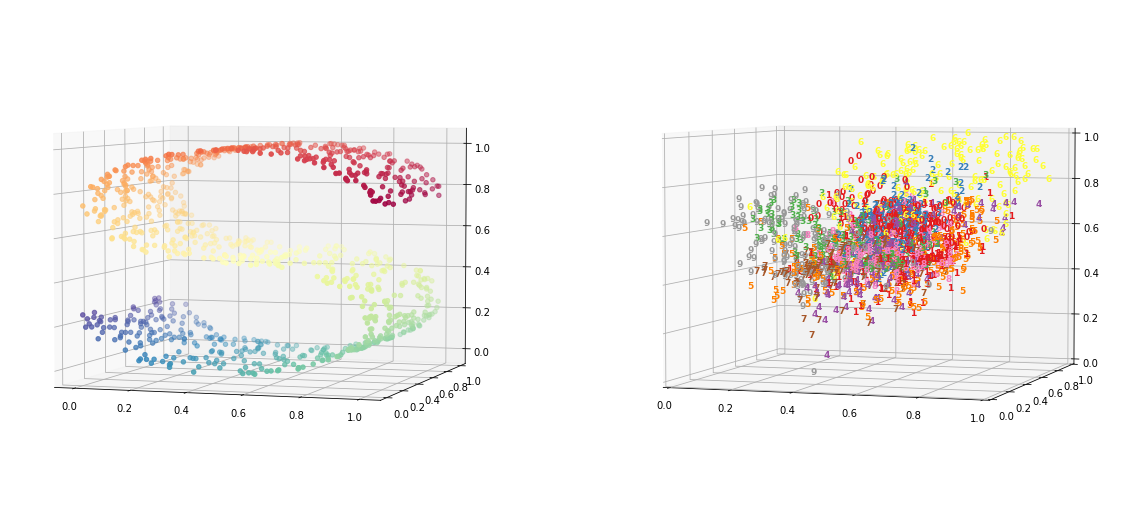

In [44]:
fig = plt.figure(figsize = (20, 10))

plot_s_curve(s_curve, color, 121, "3d")
plot_digits(projected_digits, labels, 122 , "3d")

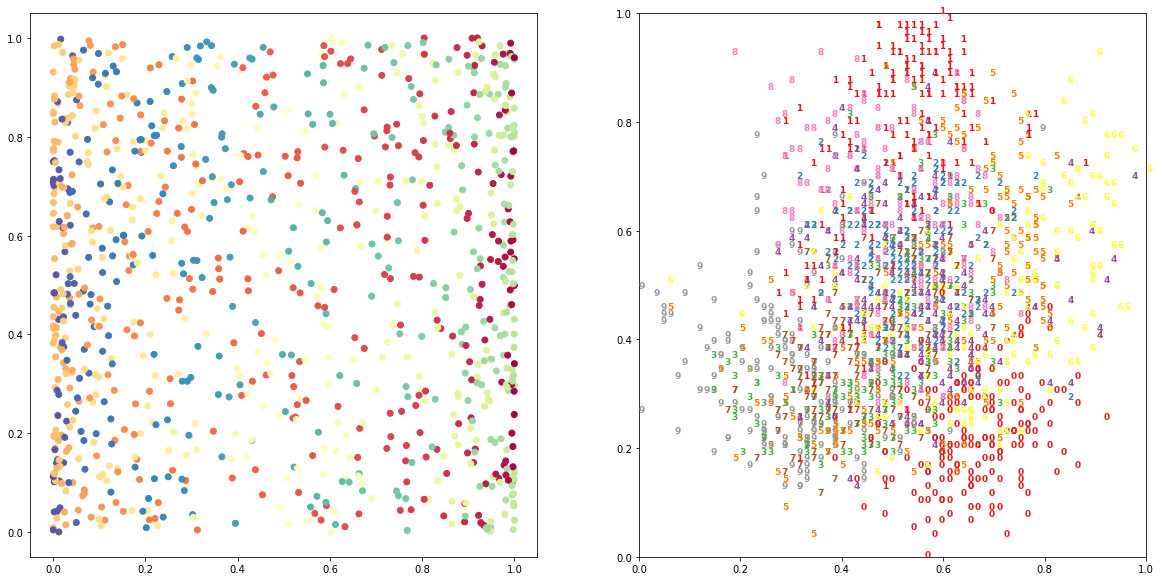

In [45]:
fig = plt.figure(figsize = (20, 10))

plot_s_curve(s_curve, color, 121, "2d")
plot_digits(projected_digits, labels, 122 , "2d")

## Locally Linear Embedding(LLE)
- 국소 이웃 거리를 보존하는 저차원의 임베딩을 찾는방식

In [46]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                             method = "standard", random_state = 0).fit_transform(s_curve)

digits_lle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                            method = "standard", random_state = 0).fit_transform(digits)

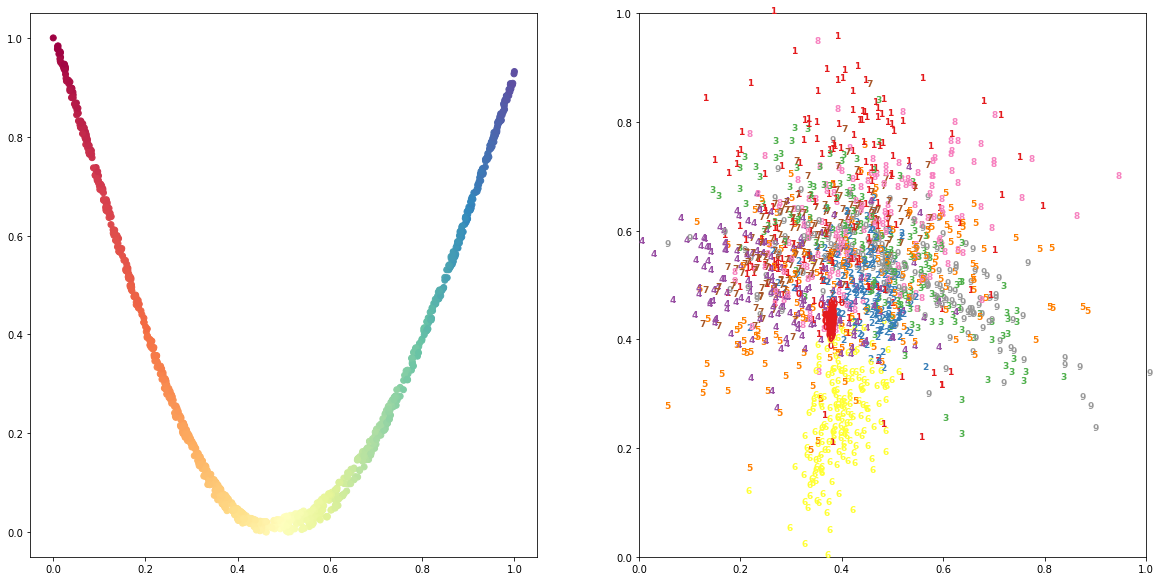

In [47]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_lle, color, 121, "2d")
plot_digits(digits_lle, labels, 122, "2d")

##  Local Tangent Space Alignment(LTSA)
- 탄젠츠 공간을 통해 각 이웃의 국소 성질을 특성화
- 국소 탄젠트 공간을 정렬

In [49]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                              method = "ltsa", random_state = 0).fit_transform(s_curve)

digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                             method = "ltsa", random_state = 0).fit_transform(digits)

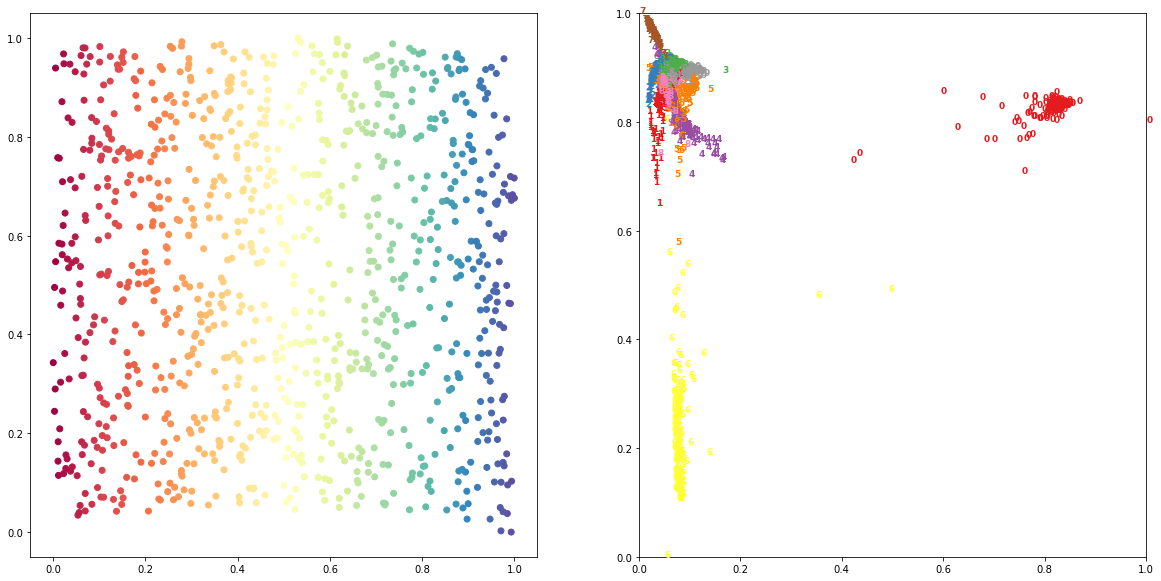

In [50]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_ltsa, color, 121, "2d")
plot_digits(digits_ltsa, labels, 122, "2d")

## Hessian Eigenmapping

- LLE의 문제를 해결한 다른 방식
- 국소 선형 구조를 복원하기 이해 각 이웃에서  hessian기반의 이차 형태를 중심으로 회전한다.

In [53]:
s_curve_Hlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                             method = "hessian", random_state = 0).fit_transform(s_curve)

digits_Hlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                            method = "hessian", random_state = 0).fit_transform(digits)

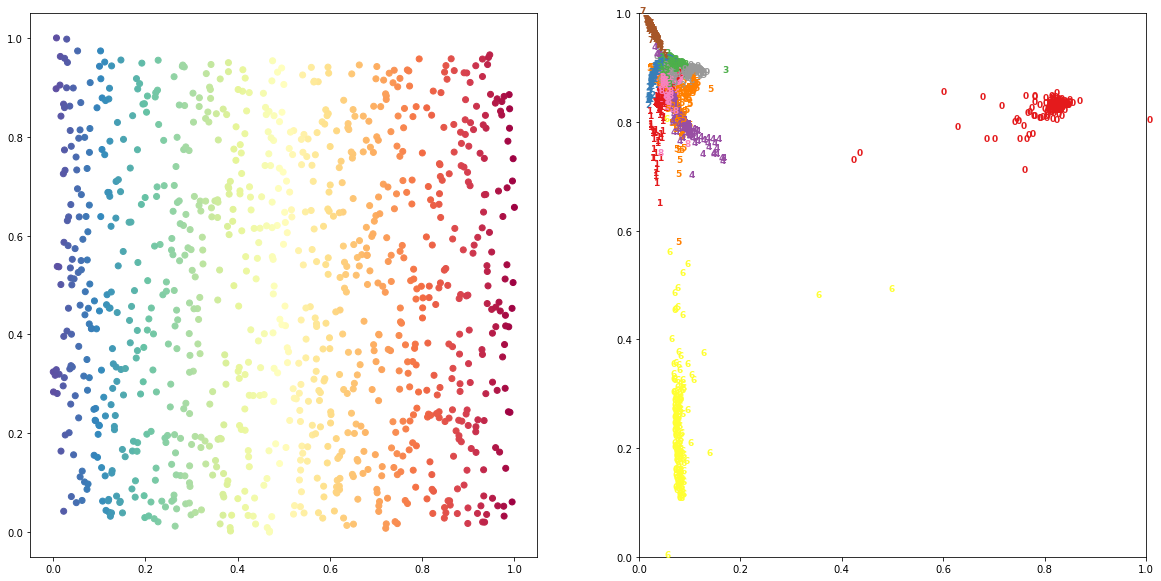

In [55]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_Hlle, color, 121, "2d")
plot_digits(digits_Hlle, labels, 122, "2d")

# s_curve를 LSTA방식과 비교했을때 색이 반대로 위치함

## Modified Locally Linear Embedding
- 각 이웃에 여러 가중치 벡터를 사용하는 방식
- n_neighbors > n_components를 만족해야 한다.

In [56]:
s_curve_Mlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                             method = "modified", random_state = 0).fit_transform(s_curve)

digits_Mlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                            method = "modified", random_state = 0).fit_transform(digits)

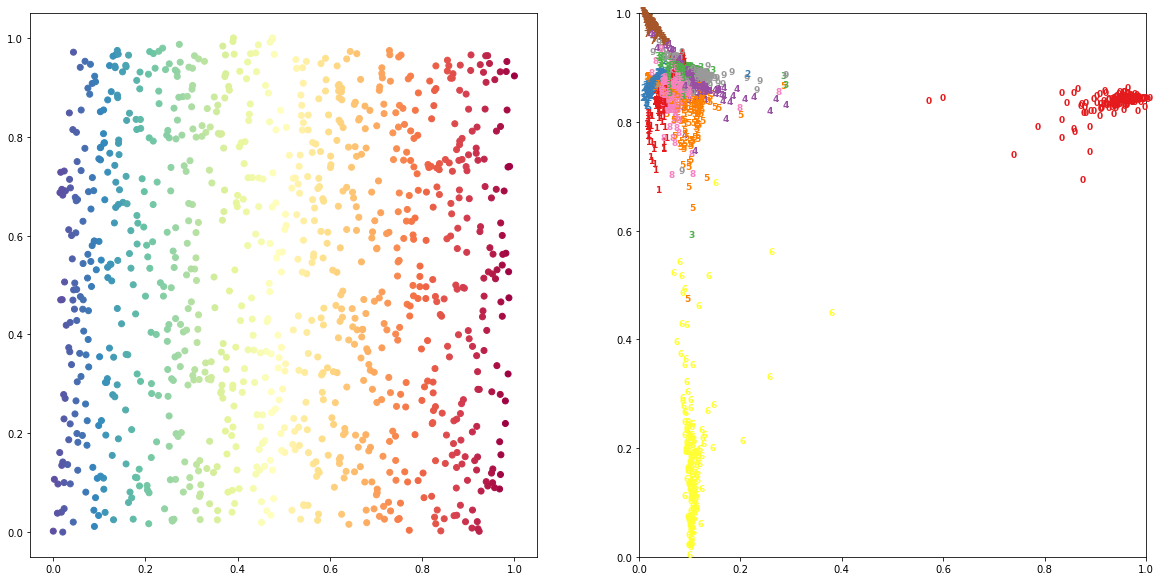

In [57]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_Mlle, color, 121, "2d")
plot_digits(digits_Mlle, labels, 122, "2d")

## Isomap
- 초기의 다양체 학습 알고리즘
- MDS와 Kernel PCA의 확장으로 볼 수 있다.
- 모든 점들 사이의 측지 거리를 유지한 저차원 임베딩을 찾는 방식이다.

In [60]:
s_curve_isomap = manifold.Isomap(n_neighbors = 30, n_components = 2).fit_transform(s_curve)

digits_isomap = manifold.Isomap(n_neighbors = 30, n_components = 2).fit_transform(digits)

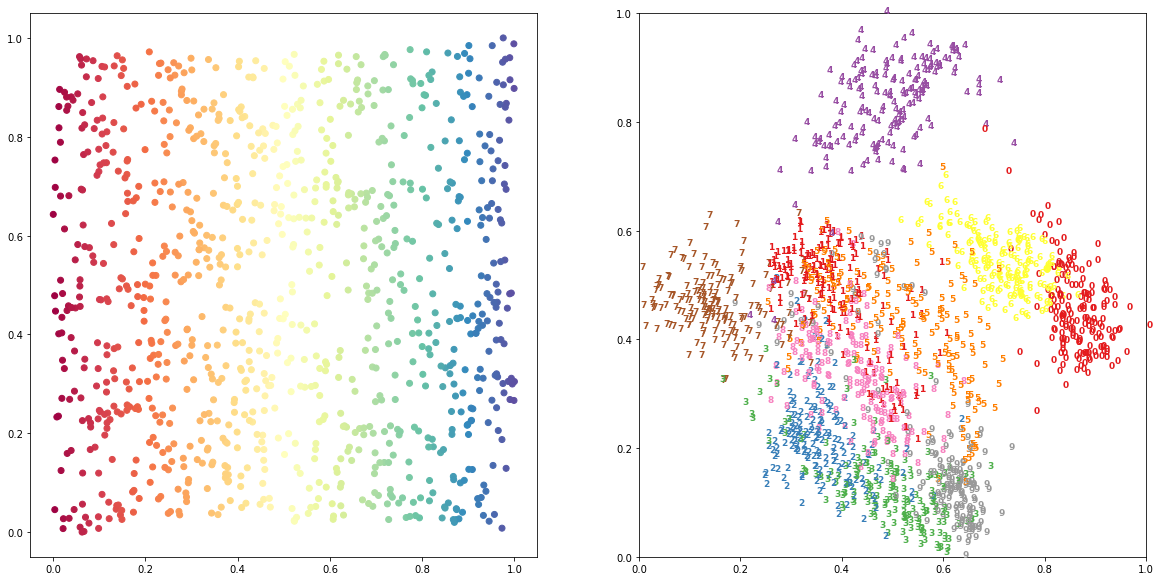

In [63]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_isomap, color, 121, "2d")
plot_digits(digits_isomap, labels, 122, "2d")

## Multi-Dimensional Scaling(MDS)
- 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾는다.

In [62]:
s_curve_mds = manifold.MDS(n_components = 2, random_state = 0).fit_transform(s_curve)

digits_mds = manifold.MDS(n_components = 2, random_state = 0).fit_transform(digits)

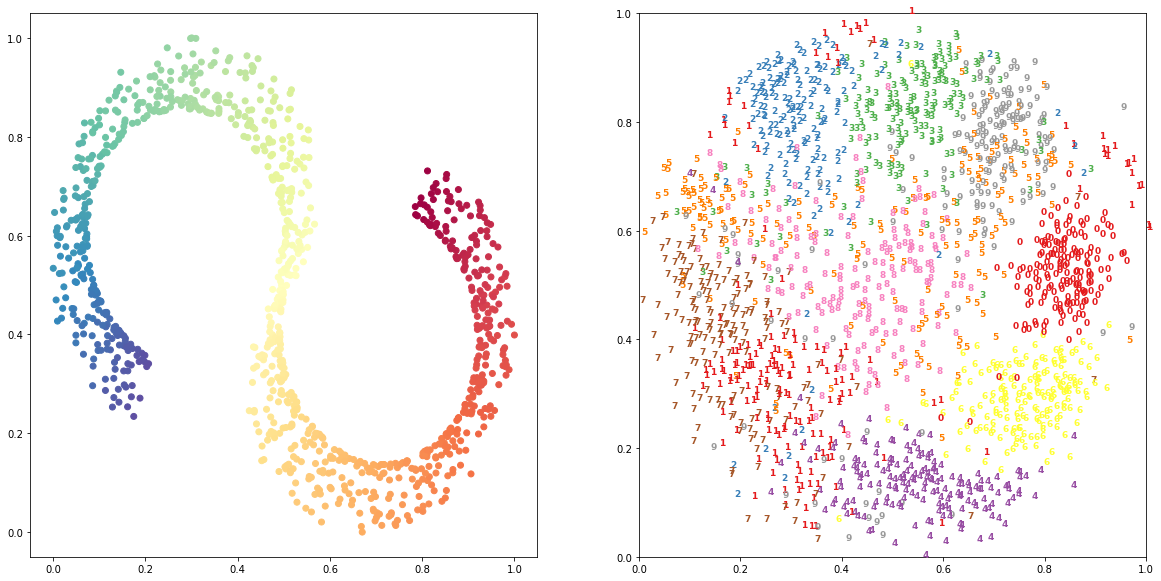

In [64]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_mds, color, 121, "2d")
plot_digits(digits_mds, labels, 122, "2d")

## Spectral Embedding
- 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾는 방식이다.
- 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 한다.

In [65]:
s_curve_se = manifold.SpectralEmbedding(n_components = 2, random_state = 0).fit_transform(s_curve)

digits_se = manifold.SpectralEmbedding(n_components = 2, random_state = 0).fit_transform(digits)

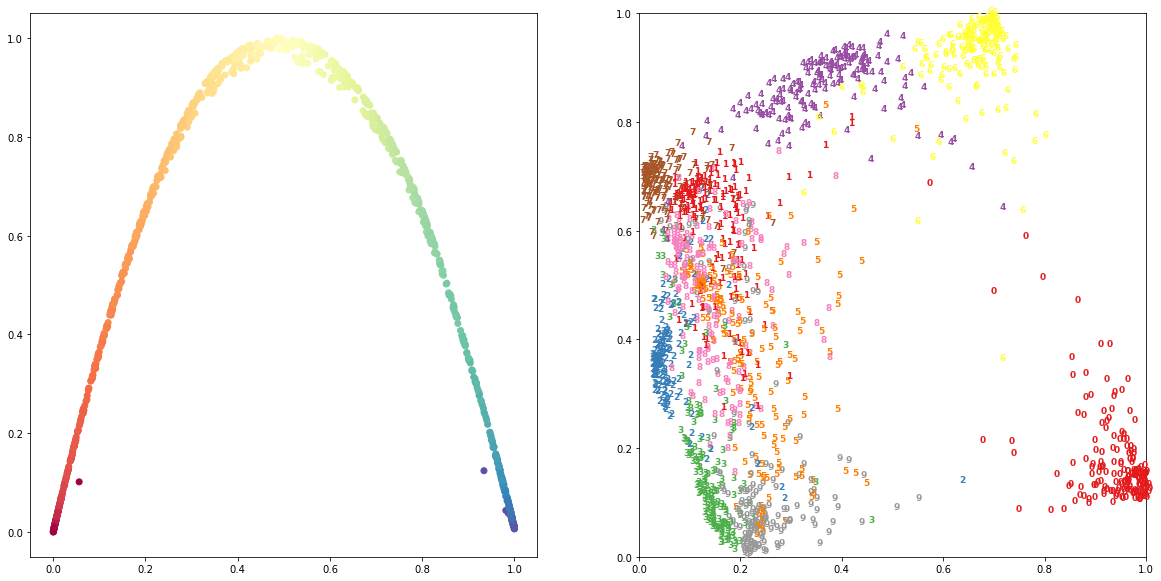

In [66]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_se, color, 121, "2d")
plot_digits(digits_se, labels, 122, "2d")

## t-distributed Stochastic Neighbor Embedding(t-SNE)
- 데이터 포인트의 유사성을 확률로 변환하는 방식이다.
- 국소 구조에 민감하다.
- 국소 구조를 기반으로 샘플 그룹을 추출하는데 강력하다.
- 항상 KL발신의 국소 최소값에서 끝난다.
- 계산 비용이 많이 든다.
- 전역 구조를 보존하지 않는다.

In [69]:
s_curve_tsne = manifold.TSNE(n_components = 2, random_state = 0).fit_transform(s_curve)

digits_tsne = manifold.TSNE(n_components = 2, random_state = 0).fit_transform(digits)

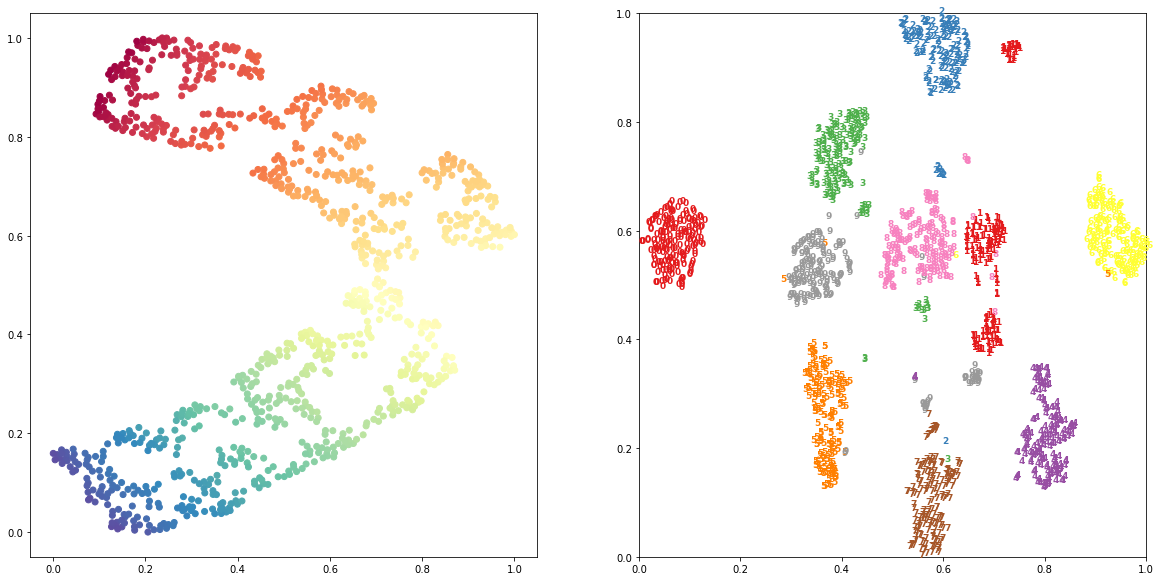

In [70]:
fit = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_tsne, color, 121, "2d")
plot_digits(digits_tsne, labels, 122, "2d")

# 정제된 표현을 활용한 학습과정으로 사용
- 다양체 학습의 결과를 정제된 데이터로 생각하고 다른 모델의 학습을 위한 input으로 사용
- 정제된 표현이기 때문에 분석에 비교적 용이하다.
- 기계학습 모델의 입력을로 사용했을때 성능향상을 기대할 수 있다.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [72]:
raw_digits, target = datasets.load_digits(return_X_y = True)

In [73]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree =  DecisionTreeClassifier()
random_forest = RandomForestClassifier()

## 원본데이터를 사용할 경우

### KNN

In [74]:
score = cross_val_score(estimator = knn,
                       X = raw_digits, y = target,
                       cv = 5)

score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [75]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


### SVM

In [88]:
score = cross_val_score(estimator = svm,
                       X = raw_digits, y = target,
                       cv = 5)

score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [89]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.9632838130609718 (+/- 0.02008605863225686)


### Decision Tree

In [78]:
score = cross_val_score(estimator = decision_tree,
                       X = raw_digits, y = target,
                       cv = 5)

score

array([0.775     , 0.70277778, 0.79387187, 0.82451253, 0.79108635])

In [79]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.7774497059733829 (+/- 0.040626230972827894)


### Random Forest

In [80]:
score = cross_val_score(estimator = random_forest,
                       X = raw_digits, y = target,
                       cv = 5)

score

array([0.93055556, 0.90833333, 0.95264624, 0.96100279, 0.93314763])

In [81]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.937137109254101 (+/- 0.018433631811050108)


## 정제된 데이터를 사용할 경우(t-SNE)

### KNN

In [82]:
score = cross_val_score(estimator = knn,
                       X = digits_tsne, y = target,
                       cv = 5)

score

array([0.96666667, 0.96666667, 0.98050139, 0.99164345, 0.96657382])

In [83]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.974410399257196 (+/- 0.010153040948451224)


### SVM

In [86]:
score = cross_val_score(estimator = svm,
                       X = digits_tsne, y = target,
                       cv = 5)

score

array([0.95      , 0.95      , 0.96935933, 0.98607242, 0.93593315])

In [87]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.9582729805013928 (+/- 0.01750239268609098)


### Decision Tree

In [90]:
score = cross_val_score(estimator = decision_tree,
                       X = digits_tsne, y = target,
                       cv = 5)

score

array([0.97777778, 0.91944444, 0.97493036, 0.98328691, 0.96100279])

In [94]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

# score가 눈에띄게 증가

mean cross val score : 0.9632884555865056 (+/- 0.02312113383024674)


### Random Forest

In [95]:
score = cross_val_score(estimator = random_forest,
                       X = digits_tsne, y = target,
                       cv = 5)

score

array([0.975     , 0.91944444, 0.98885794, 0.99164345, 0.96935933])

In [96]:
print("mean cross val score : {} (+/- {})".format(score.mean(), score.std()))

mean cross val score : 0.9688610337356856 (+/- 0.026072396853327073)
